In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
pd.options.display.max_columns = None
df = pd.read_csv('../확인스v3.csv',encoding='cp949')
df = df.replace(1254789.63,np.nan)
# df['설비투자효율'] = df['설비투자효율'].astype(float)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인딩부가가치
0,(주)CMG제약,58820,11-Dec,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-46.08,-24.07,-213.61,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78
1,(주)CMG제약,58820,12-Dec,-7.75,109.15,-4.12,207.08,75.17,-8.43,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,0.39,4.09,1.75,1.71,7.83,0.66,0.93,0.52,0.81,693.49,649.98,68.81,80.77,0.18,-8.10,-12.71,-2066.51,55.32,77.32,82.49,323.41,21.50,44.68,6.27,7.33,70.60,69458.82,32002.75,426.18,0.000000,0.47,1.66,2009.78
2,(주)CMG제약,58820,13-Dec,0.70,-2.09,16.09,-18.89,55.10,25.51,38.70,1.45,0.74,1.40,3.88,0.52,0.36,3.30,2.02,2.03,6.20,0.51,1.26,0.48,1.25,694.71,610.74,394.63,14.11,0.00,-39.85,-13.51,0.00,87.63,60.08,68.34,282.72,11.23,12.37,12.09,14.12,58.50,66012.04,33789.62,411.12,77.914703,12.51,34.29,51433.09
3,(주)CMG제약,58820,14-Dec,3.60,3.86,74.30,-25.93,0.01,11.52,37.07,0.69,0.32,0.78,1.94,0.28,0.40,3.00,1.85,1.54,5.27,0.46,2.85,0.68,2.32,324.58,268.23,101.24,18.50,0.01,-17.73,-7.06,-29481.93,84.39,40.28,48.74,285.31,17.79,15.61,17.36,25.09,33.72,113899.65,48479.94,354.08,37.802533,12.16,31.04,43056.95
4,(주)CMG제약,58820,15-Dec,-32.22,-2.64,-5.37,-7.17,-4.48,18.85,36.26,-13.50,-7.62,-4.49,-9.51,-6.37,0.47,3.32,2.09,1.48,5.66,0.56,2.88,0.99,3.10,296.85,235.21,29.00,20.78,0.01,16.12,5.80,24988.83,82.80,36.82,46.47,254.69,18.91,17.20,20.77,31.32,30.82,114246.59,53386.77,362.39,0.000000,7.63,15.96,27662.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,흥아해운(주),3280,15-Dec,1.02,21.93,49.36,-11.18,3.39,2.42,6.20,1.24,6.18,2.95,2.51,1.46,1.17,64.23,17.20,2.09,16.05,4.96,1.54,5.83,-13.39,51.92,47.54,7.76,357.39,24.52,2.78,2.03,8.85,21.86,15.76,17.21,60.44,151.66,78.14,8.43,-9.10,-15.94,593960.16,14.23,973.73,21.494004,13.11,12.28,127665.82
8828,흥아해운(주),3280,16-Dec,0.21,21.08,38.84,-25.08,11.22,-1.58,4.49,-2.06,-9.40,0.67,0.71,-1.96,0.95,53.94,17.35,1.44,16.26,4.55,1.20,6.98,-10.62,39.46,32.52,5.46,397.97,19.03,2.12,1.96,8.92,20.08,8.78,10.65,68.73,134.41,79.92,17.60,-11.47,-16.34,706868.14,12.28,1017.55,15.812610,10.98,12.66,111774.30
8829,흥아해운(주),3280,17-Dec,-0.42,-11.43,-16.50,13.29,-39.28,0.56,2.09,-8.79,-47.52,-1.45,-1.57,-8.13,0.93,43.17,15.61,1.36,15.39,5.41,1.12,7.68,-8.05,35.76,29.58,6.17,626.32,22.90,-0.57,-0.50,-2.13,13.77,11.27,13.63,65.00,276.77,86.23,17.27,-9.61,-24.48,599097.86,12.56,921.78,8.349918,5.43,5.51,50024.18
8830,흥아해운(주),3280,18-Dec,-1.16,-5.33,-12.07,-6.33,-37.42,-9.87,-0.93,-11.48,-91.08,-4.55,-4.99,-10.47,0.91,39.24,12.79,1.43,11.87,7.93,1.03,6.73,-7.39,34.67,28.66,4.89,998.73,22.24,-2.78,-2.70,-11.38,9.10,11.14,13.48,59.32,427.21,90.90,17.36,-9.21,-25.40,618981.48,14.54,1009.67,0.000000,4.24,4.52,42782.54


In [24]:
column = df[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인딩부가가치']]

<AxesSubplot:>

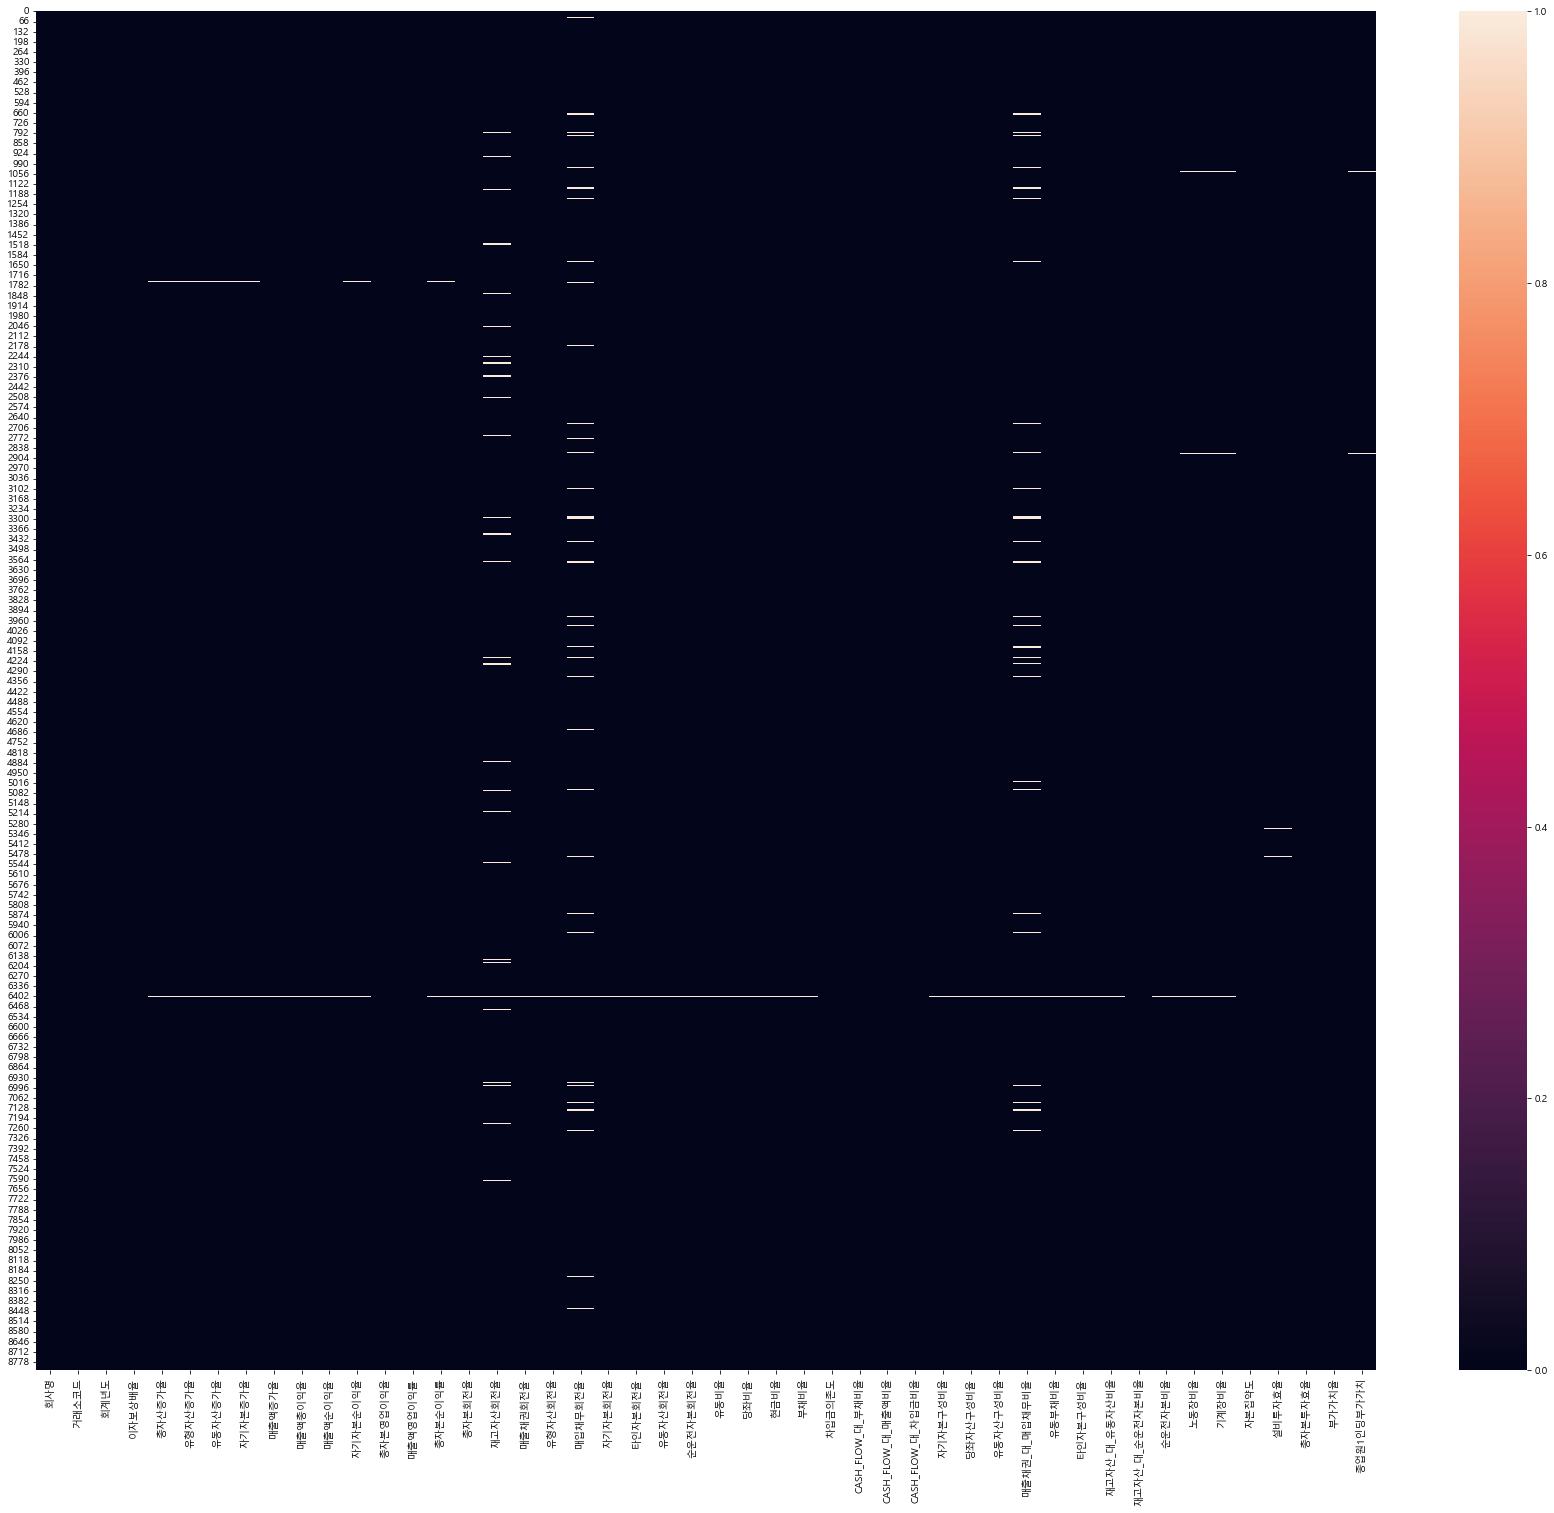

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

In [4]:
medi = lambda x: x.fillna(x.mean())
df = df.groupby('회사명').apply(medi)
df = df.dropna()
df = df.reset_index(drop=True)

C:\Users\82104\AppData\Local\Temp\ipykernel_11620\2406321097.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medi = lambda x: x.fillna(x.mean())


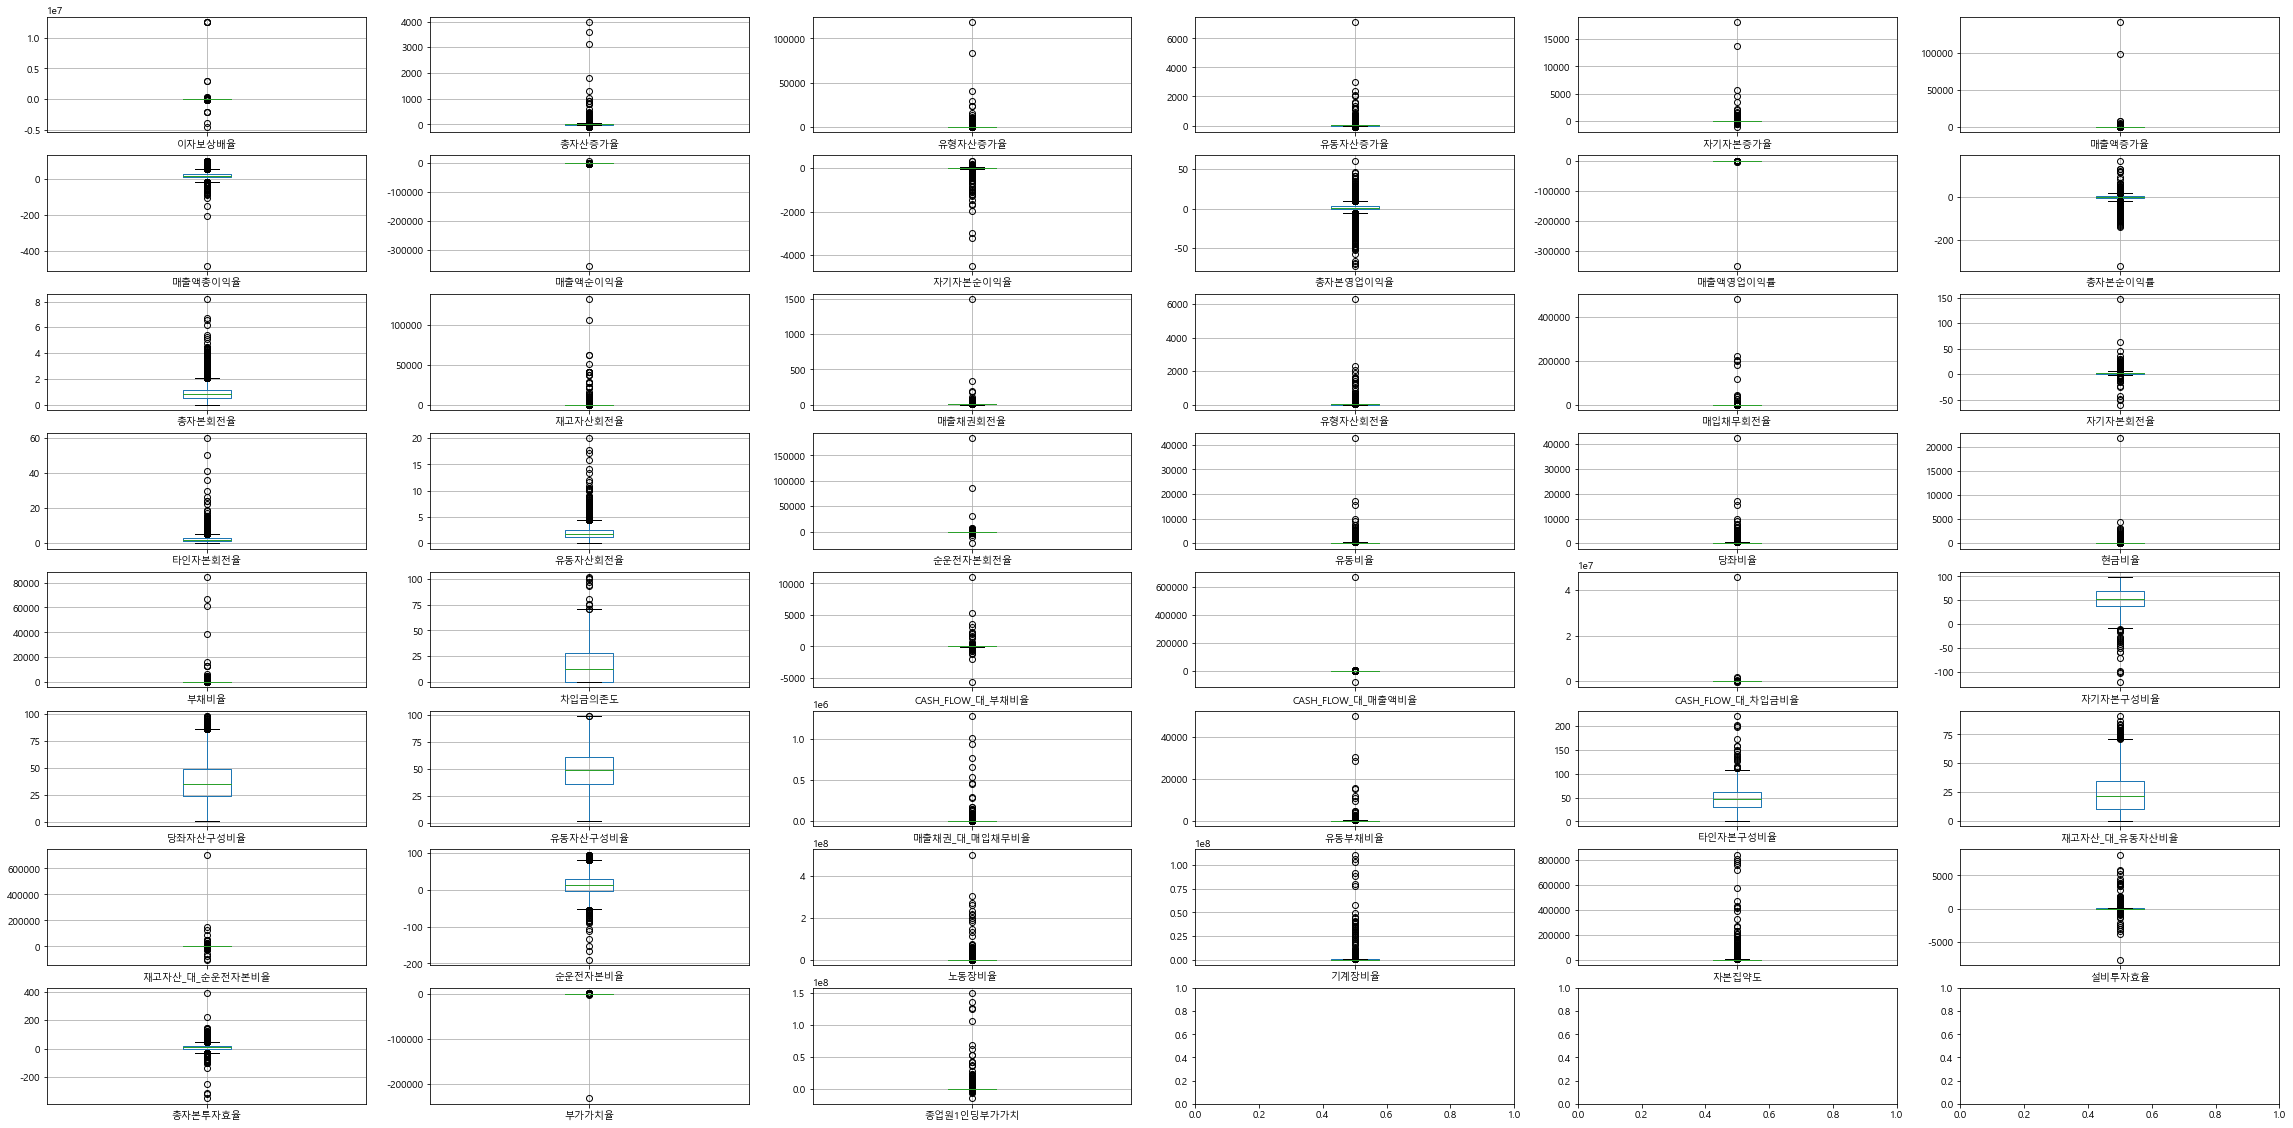

In [5]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인딩부가가치', ax=axes[7,2])

plt.show()

In [6]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인딩부가가치'],
      dtype='object')

### 이상치제거

In [7]:
cols = []

total_df1_iqr = df.copy()
total_df1_iqr = total_df1_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인딩부가가치']]
cols.append([col for col in total_df1_iqr])

Q1 = total_df1_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인딩부가가치']].quantile(q=0.25)

Q3 = total_df1_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인딩부가가치']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    total_df1_iqr[i] = total_df1_iqr[i][(total_df1_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df1_iqr[i] >= Q1[i]-1.5*IQR[i])]

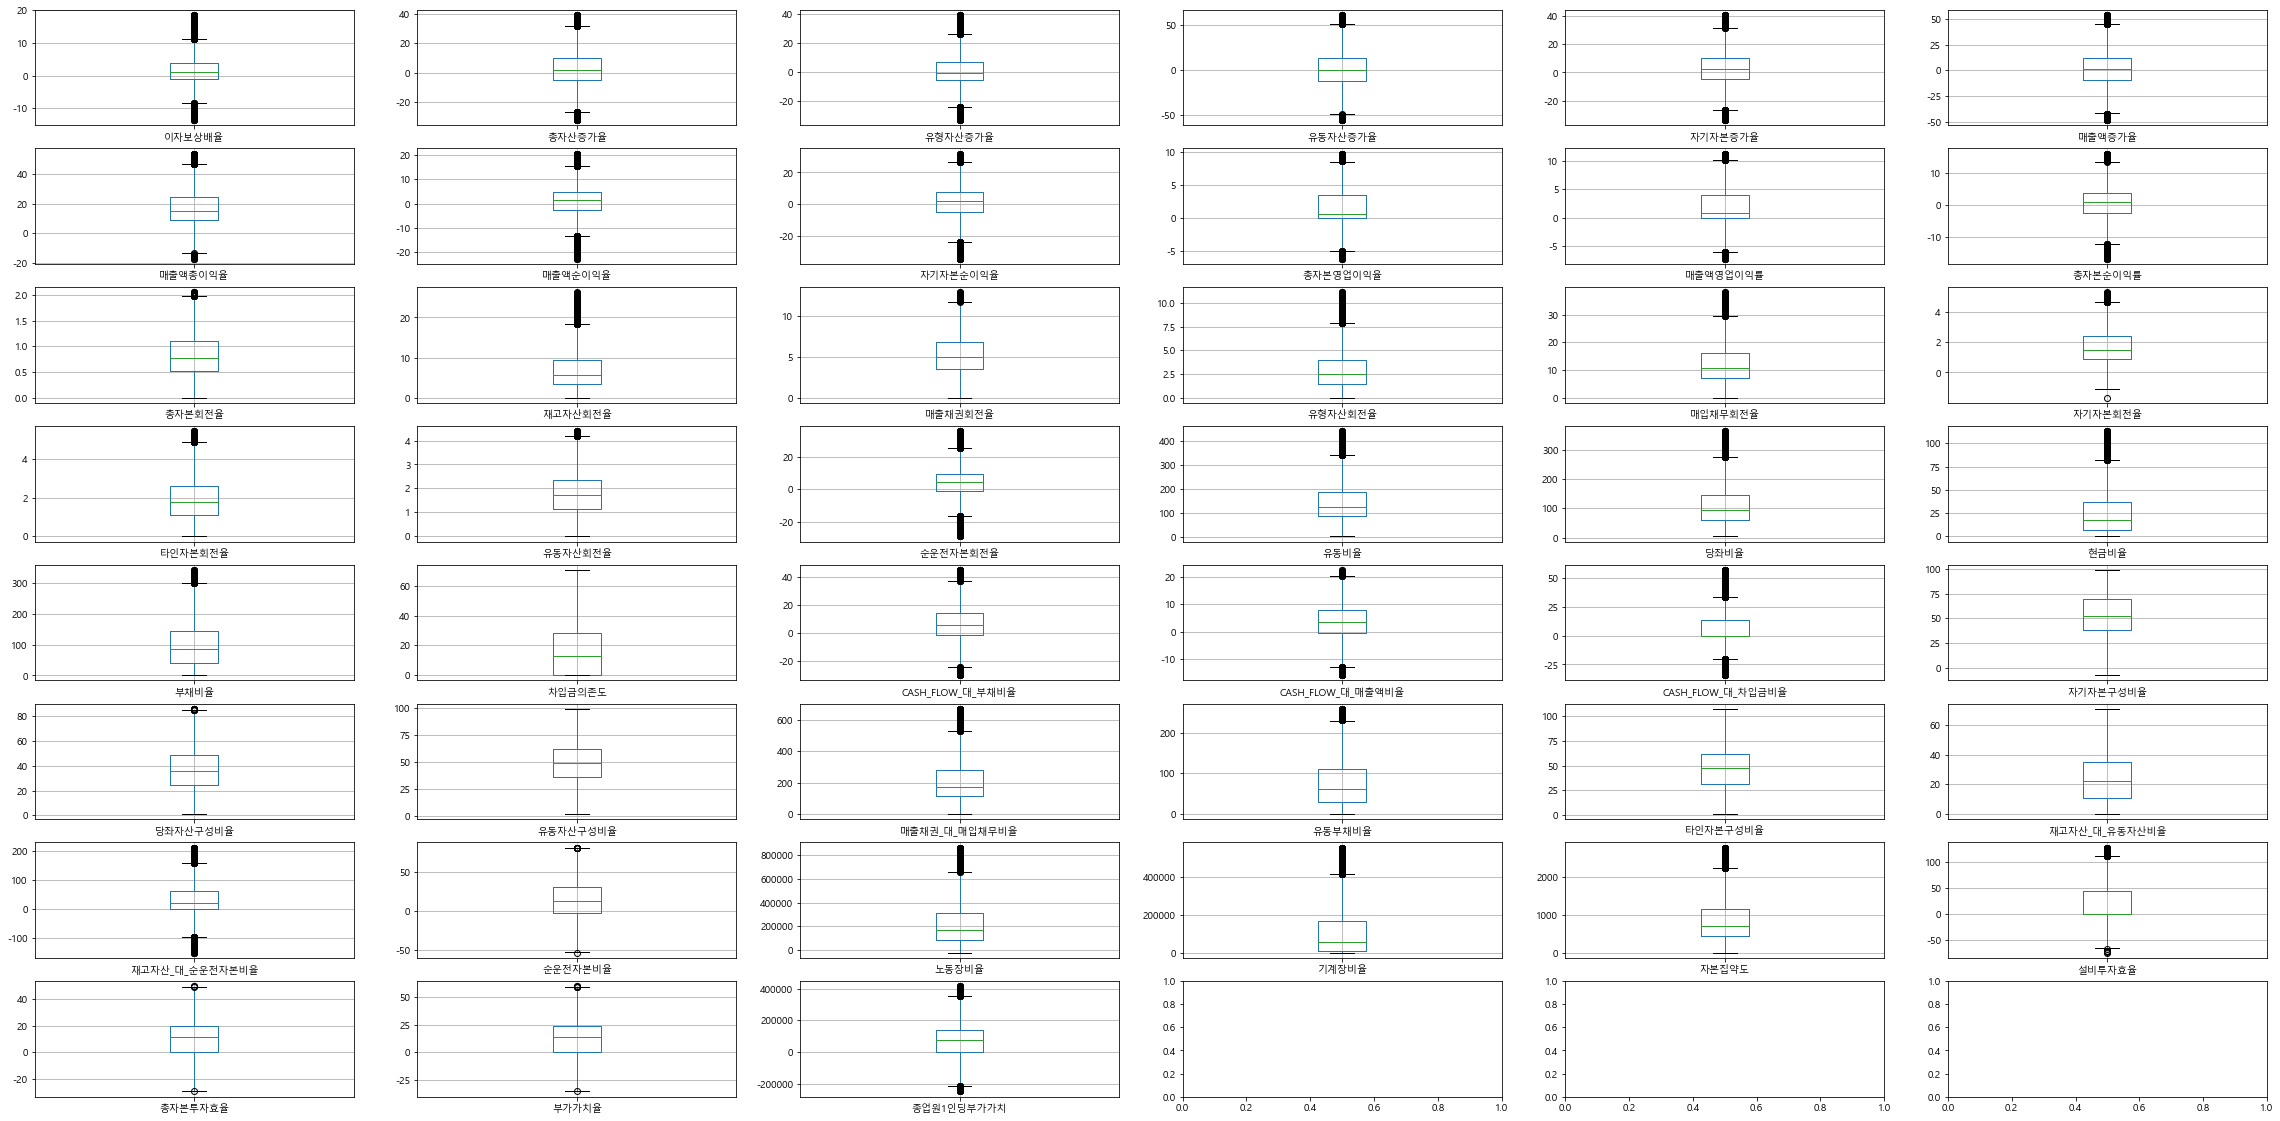

In [8]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

total_df1_iqr.boxplot(column='이자보상배율', ax=axes[0,0])
total_df1_iqr.boxplot(column='총자산증가율', ax=axes[0,1])
total_df1_iqr.boxplot(column='유형자산증가율', ax=axes[0,2])
total_df1_iqr.boxplot(column='유동자산증가율', ax=axes[0,3])
total_df1_iqr.boxplot(column='자기자본증가율', ax=axes[0,4])
total_df1_iqr.boxplot(column='매출액증가율', ax=axes[0,5])
total_df1_iqr.boxplot(column='매출액총이익율', ax=axes[1,0])
total_df1_iqr.boxplot(column='매출액순이익율', ax=axes[1,1])
total_df1_iqr.boxplot(column='자기자본순이익율', ax=axes[1,2])
total_df1_iqr.boxplot(column='총자본영업이익율', ax=axes[1,3])
total_df1_iqr.boxplot(column='매출액영업이익률', ax=axes[1,4])
total_df1_iqr.boxplot(column='총자본순이익률', ax=axes[1,5])
total_df1_iqr.boxplot(column='총자본회전율', ax=axes[2,0])
total_df1_iqr.boxplot(column='재고자산회전율', ax=axes[2,1])
total_df1_iqr.boxplot(column='매출채권회전율', ax=axes[2,2])
total_df1_iqr.boxplot(column='유형자산회전율', ax=axes[2,3])
total_df1_iqr.boxplot(column='매입채무회전율', ax=axes[2,4])
total_df1_iqr.boxplot(column='자기자본회전율', ax=axes[2,5])
total_df1_iqr.boxplot(column='타인자본회전율', ax=axes[3,0])
total_df1_iqr.boxplot(column='유동자산회전율', ax=axes[3,1])
total_df1_iqr.boxplot(column='순운전자본회전율', ax=axes[3,2])
total_df1_iqr.boxplot(column='유동비율', ax=axes[3,3])
total_df1_iqr.boxplot(column='당좌비율', ax=axes[3,4])
total_df1_iqr.boxplot(column='현금비율', ax=axes[3,5])
total_df1_iqr.boxplot(column='부채비율', ax=axes[4,0])
total_df1_iqr.boxplot(column='차입금의존도', ax=axes[4,1])
total_df1_iqr.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
total_df1_iqr.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
total_df1_iqr.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
total_df1_iqr.boxplot(column='자기자본구성비율', ax=axes[4,5])
total_df1_iqr.boxplot(column='당좌자산구성비율', ax=axes[5,0])
total_df1_iqr.boxplot(column='유동자산구성비율', ax=axes[5,1])
total_df1_iqr.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
total_df1_iqr.boxplot(column='유동부채비율', ax=axes[5,3])
total_df1_iqr.boxplot(column='타인자본구성비율', ax=axes[5,4])
total_df1_iqr.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
total_df1_iqr.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
total_df1_iqr.boxplot(column='순운전자본비율', ax=axes[6,1])
total_df1_iqr.boxplot(column='노동장비율', ax=axes[6,2])
total_df1_iqr.boxplot(column='기계장비율', ax=axes[6,3])
total_df1_iqr.boxplot(column='자본집약도', ax=axes[6,4])
total_df1_iqr.boxplot(column='설비투자효율', ax=axes[6,5])
total_df1_iqr.boxplot(column='총자본투자효율', ax=axes[7,0])
total_df1_iqr.boxplot(column='부가가치율', ax=axes[7,1])
total_df1_iqr.boxplot(column='종업원1인딩부가가치', ax=axes[7,2])

plt.show()

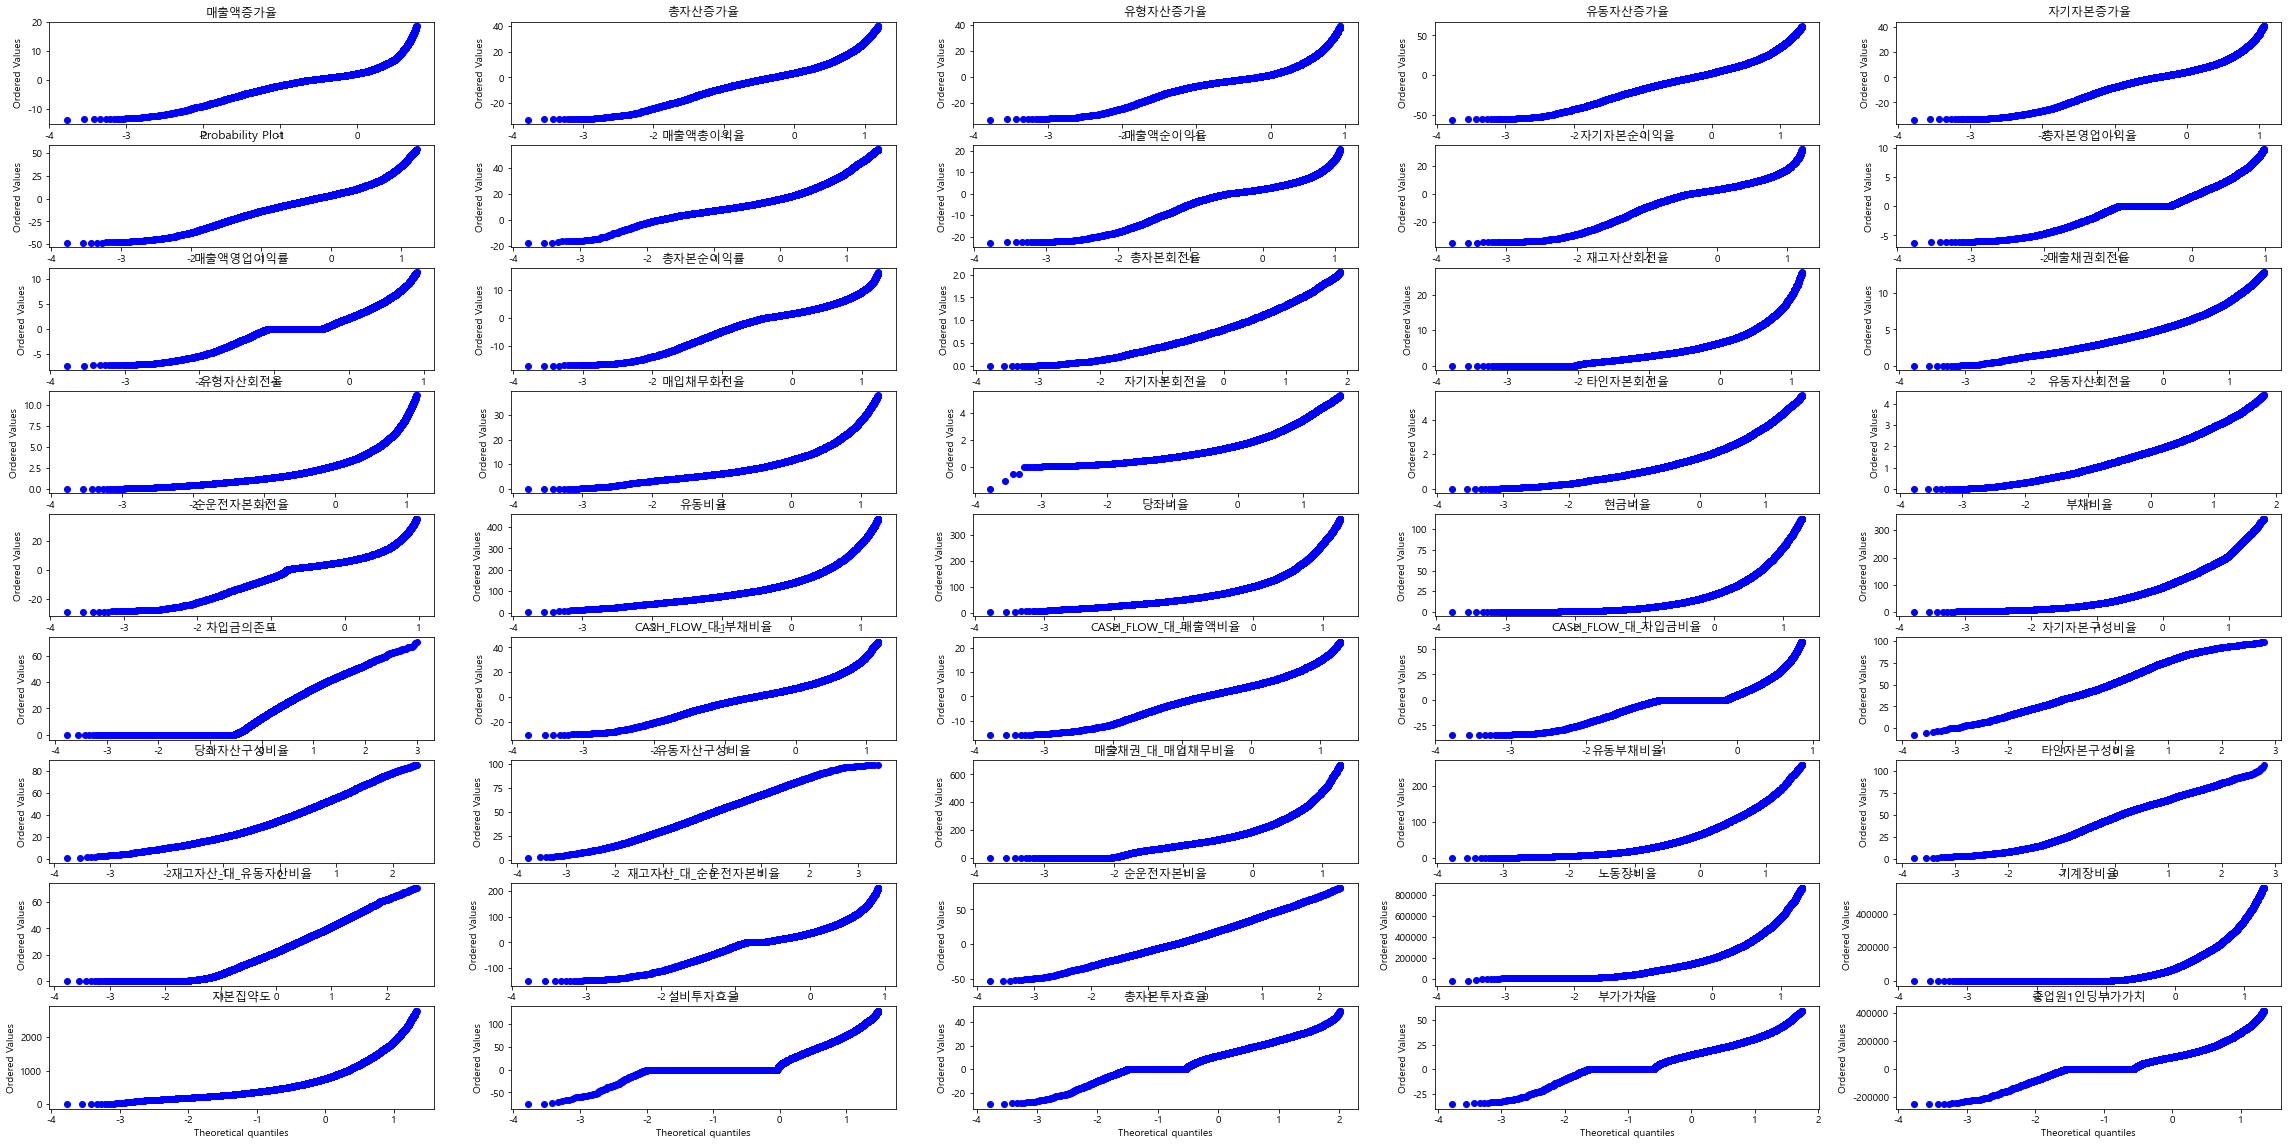

In [9]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

stats.probplot(total_df1_iqr['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(total_df1_iqr['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(total_df1_iqr['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(total_df1_iqr['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(total_df1_iqr['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(total_df1_iqr['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(total_df1_iqr['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(total_df1_iqr['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(total_df1_iqr['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(total_df1_iqr['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(total_df1_iqr['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(total_df1_iqr['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(total_df1_iqr['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(total_df1_iqr['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(total_df1_iqr['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(total_df1_iqr['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(total_df1_iqr['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(total_df1_iqr['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(total_df1_iqr['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(total_df1_iqr['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(total_df1_iqr['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(total_df1_iqr['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(total_df1_iqr['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(total_df1_iqr['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(total_df1_iqr['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(total_df1_iqr['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(total_df1_iqr['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(total_df1_iqr['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(total_df1_iqr['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(total_df1_iqr['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(total_df1_iqr['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(total_df1_iqr['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(total_df1_iqr['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(total_df1_iqr['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(total_df1_iqr['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(total_df1_iqr['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(total_df1_iqr['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(total_df1_iqr['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(total_df1_iqr['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(total_df1_iqr['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(total_df1_iqr['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(total_df1_iqr['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(total_df1_iqr['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(total_df1_iqr['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(total_df1_iqr['종업원1인딩부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인딩부가가치")

plt.show()

### 이상치 조정

In [10]:
from scipy.stats.mstats import winsorize
df1 = df.iloc[:,3:].copy()
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

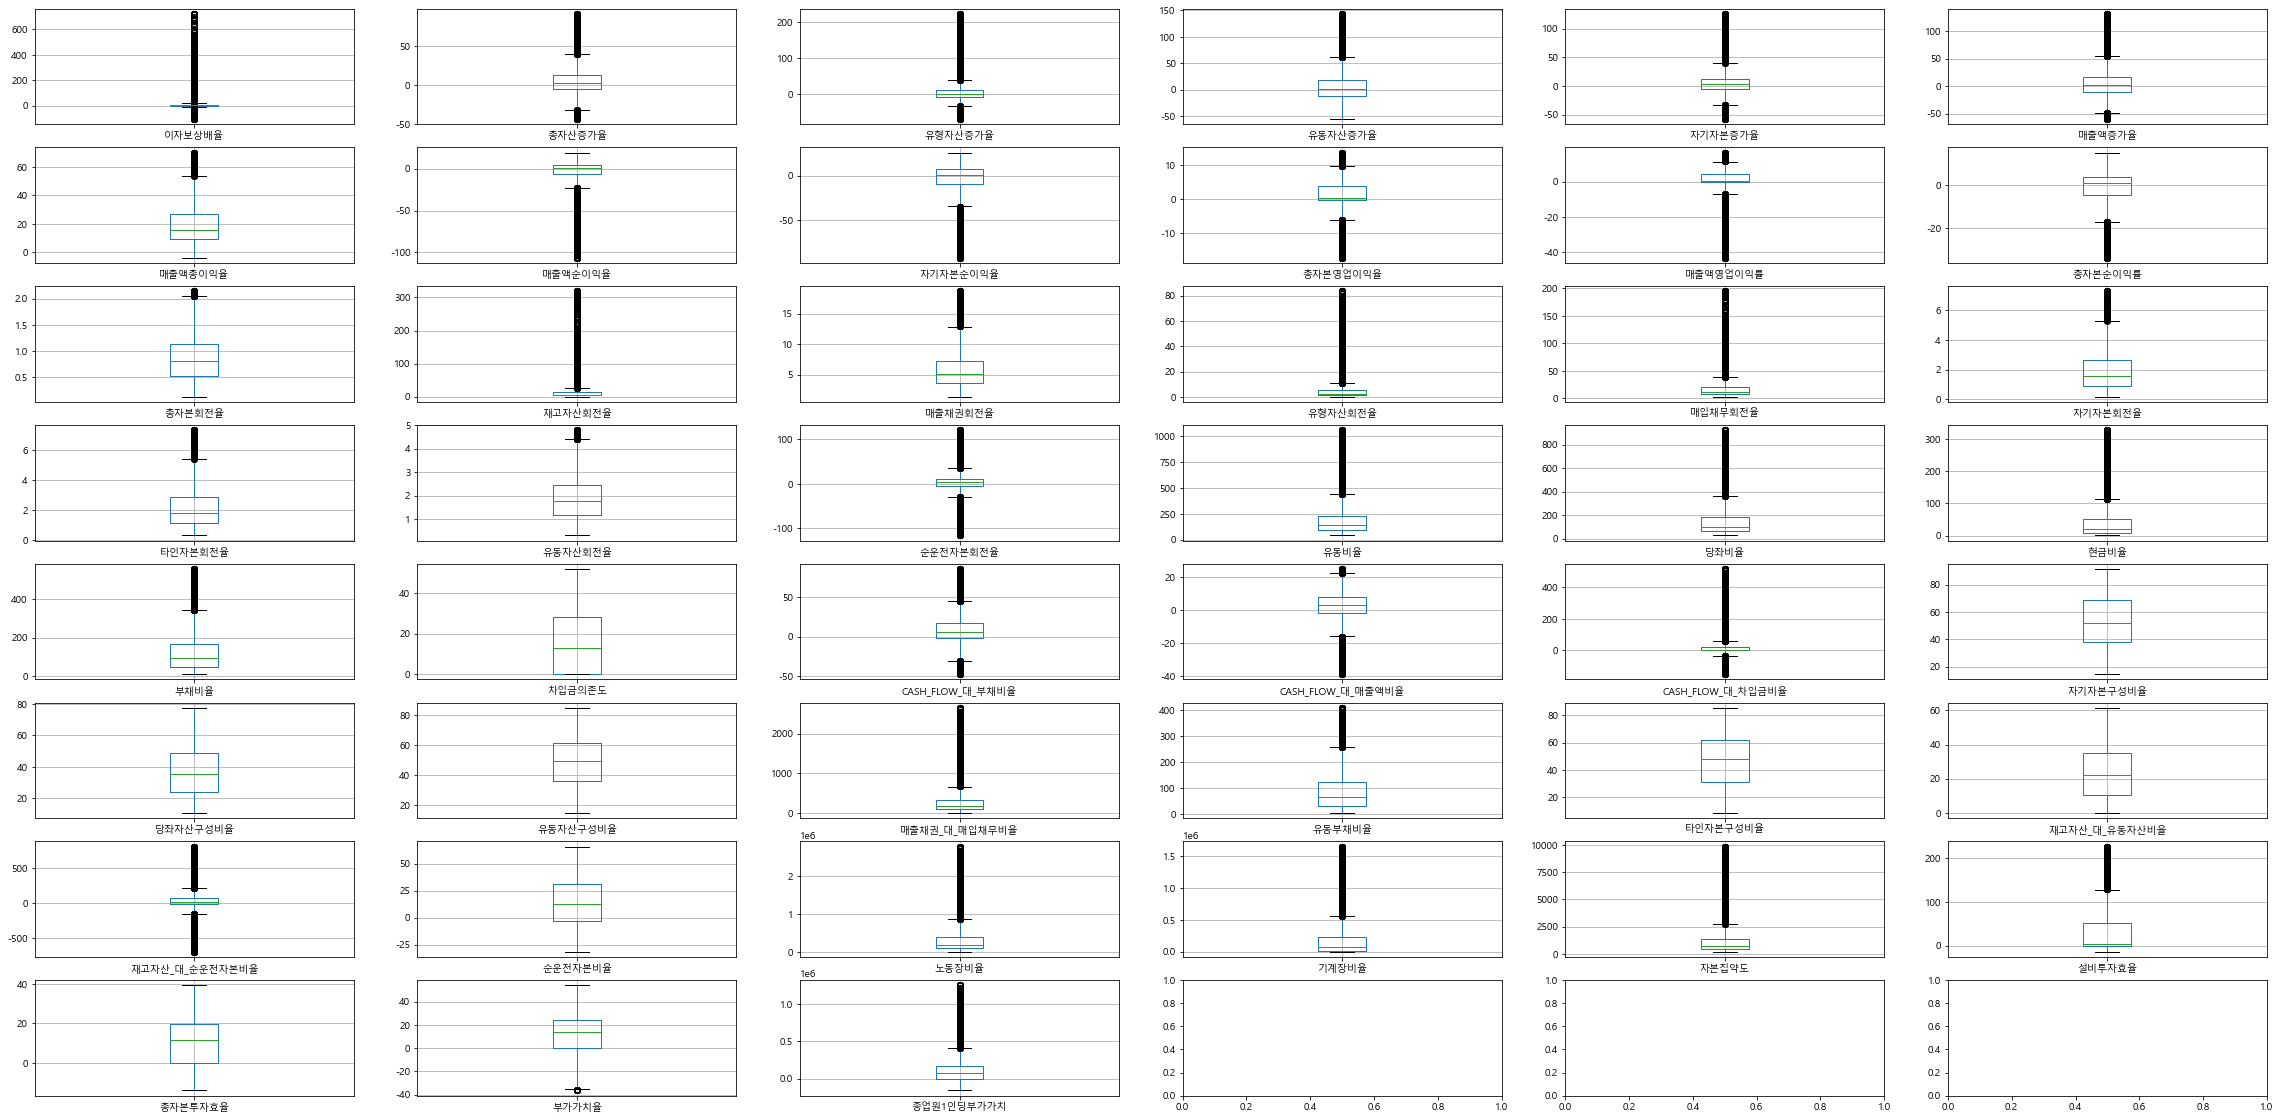

In [11]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인딩부가가치', ax=axes[7,2])

plt.show()

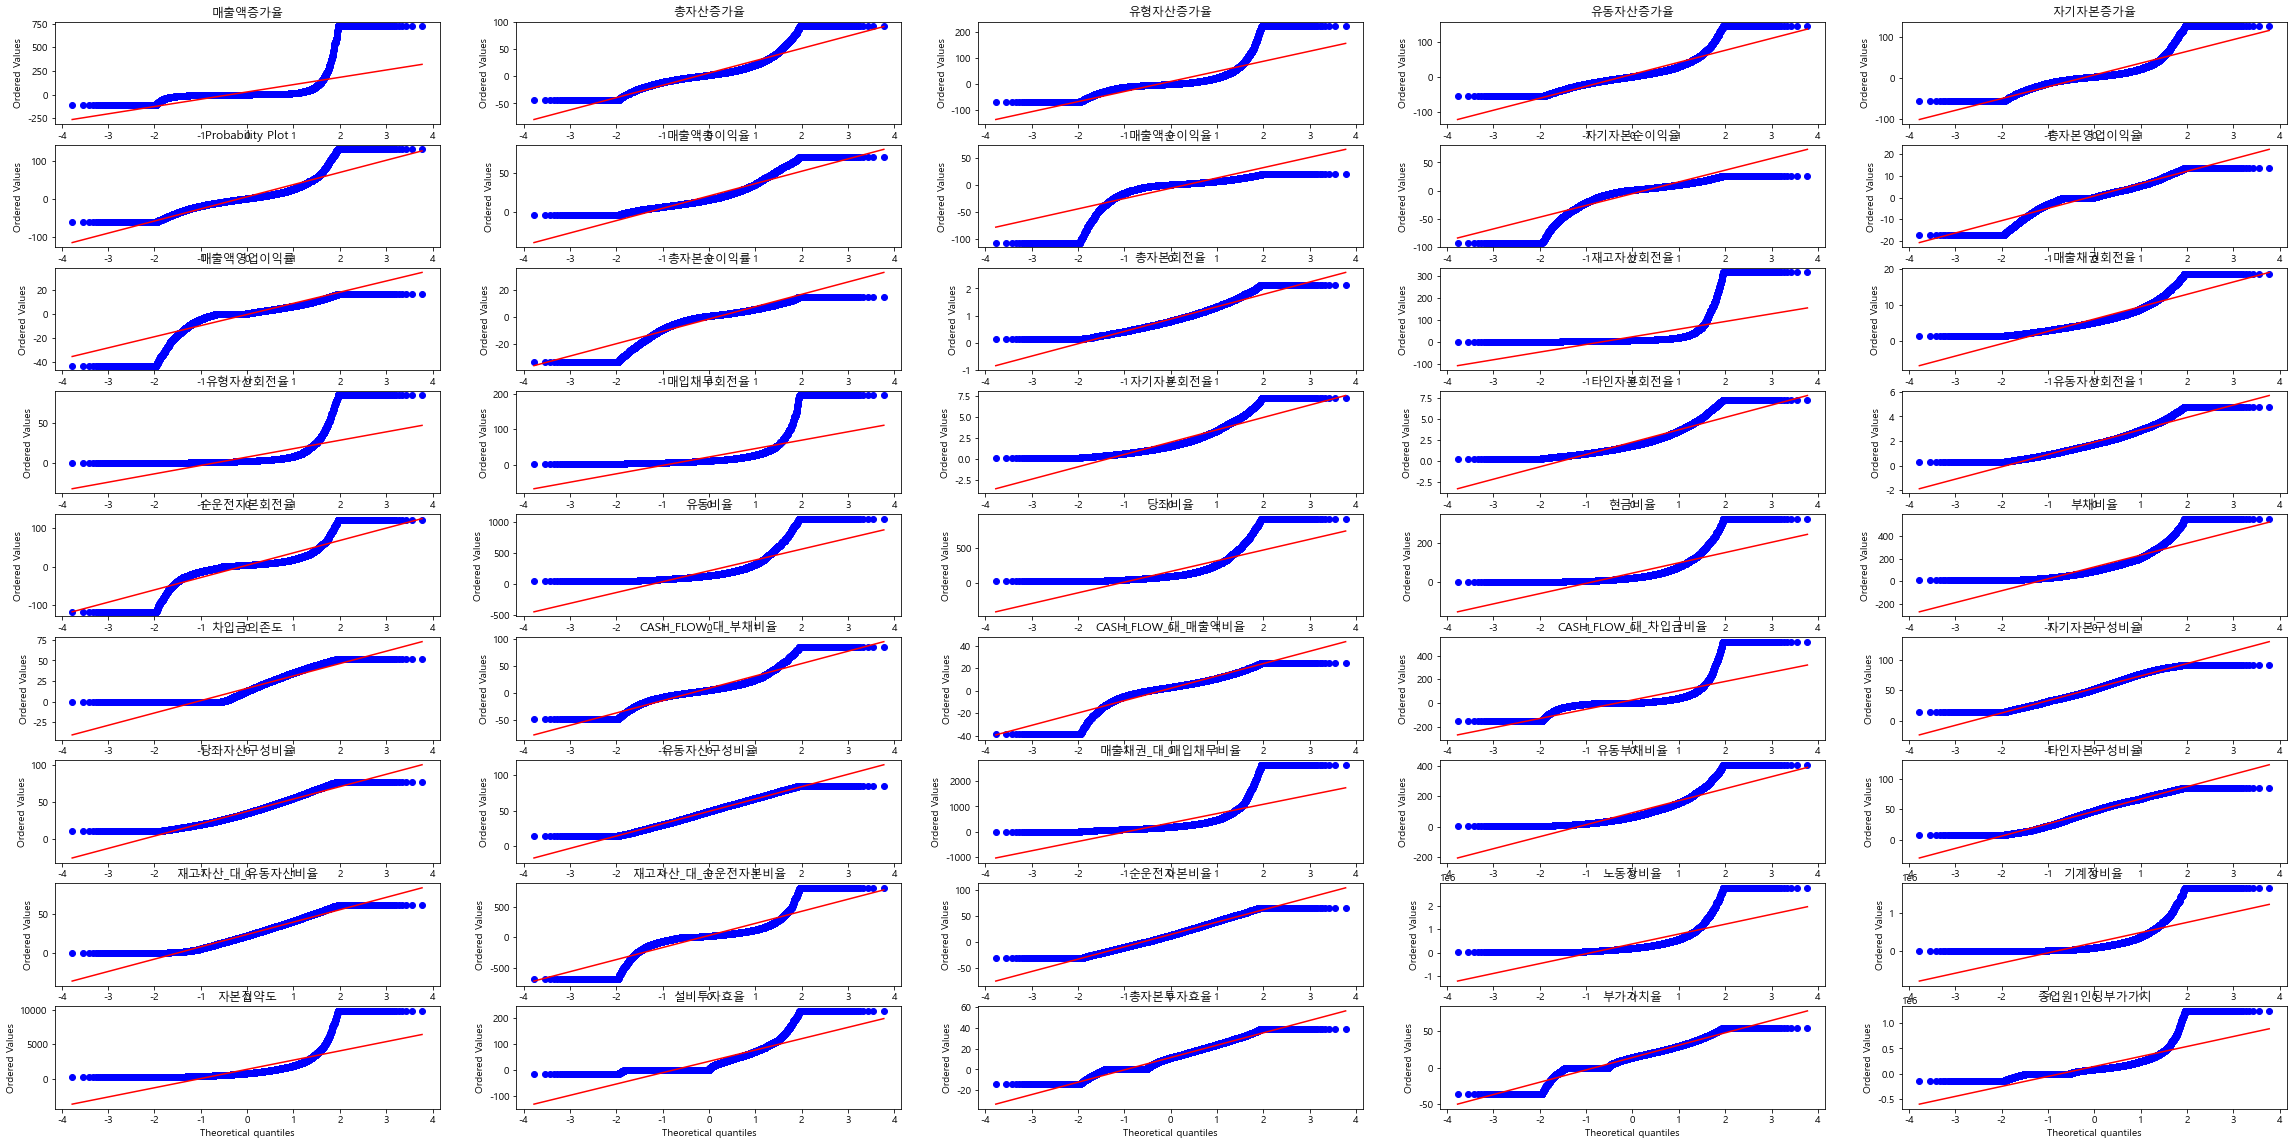

In [12]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인딩부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인딩부가가치")

plt.show()

### 정규화 하고 정규성 보기

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()
ss_sc = SS.fit_transform(column)
# ss_sc_iqr = SS.fit_transform(df)
ss_sc2 = pd.DataFrame(ss_sc)
# ss_sc_iqr = pd.DataFrame(ss_sc_iqr)
rs_sc = RS.fit_transform(column)
# rs_sc_iqr = RS.fit_transform(df)
rs_sc2 = pd.DataFrame(rs_sc)
# rs_sc_iqr2 = pd.DataFrame(rs_sc_iqr)
mi_sc = MIN.fit_transform(column)
mi_sc2 = pd.DataFrame(mi_sc)

In [26]:
ss_sc2.columns = ['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인딩부가가치']

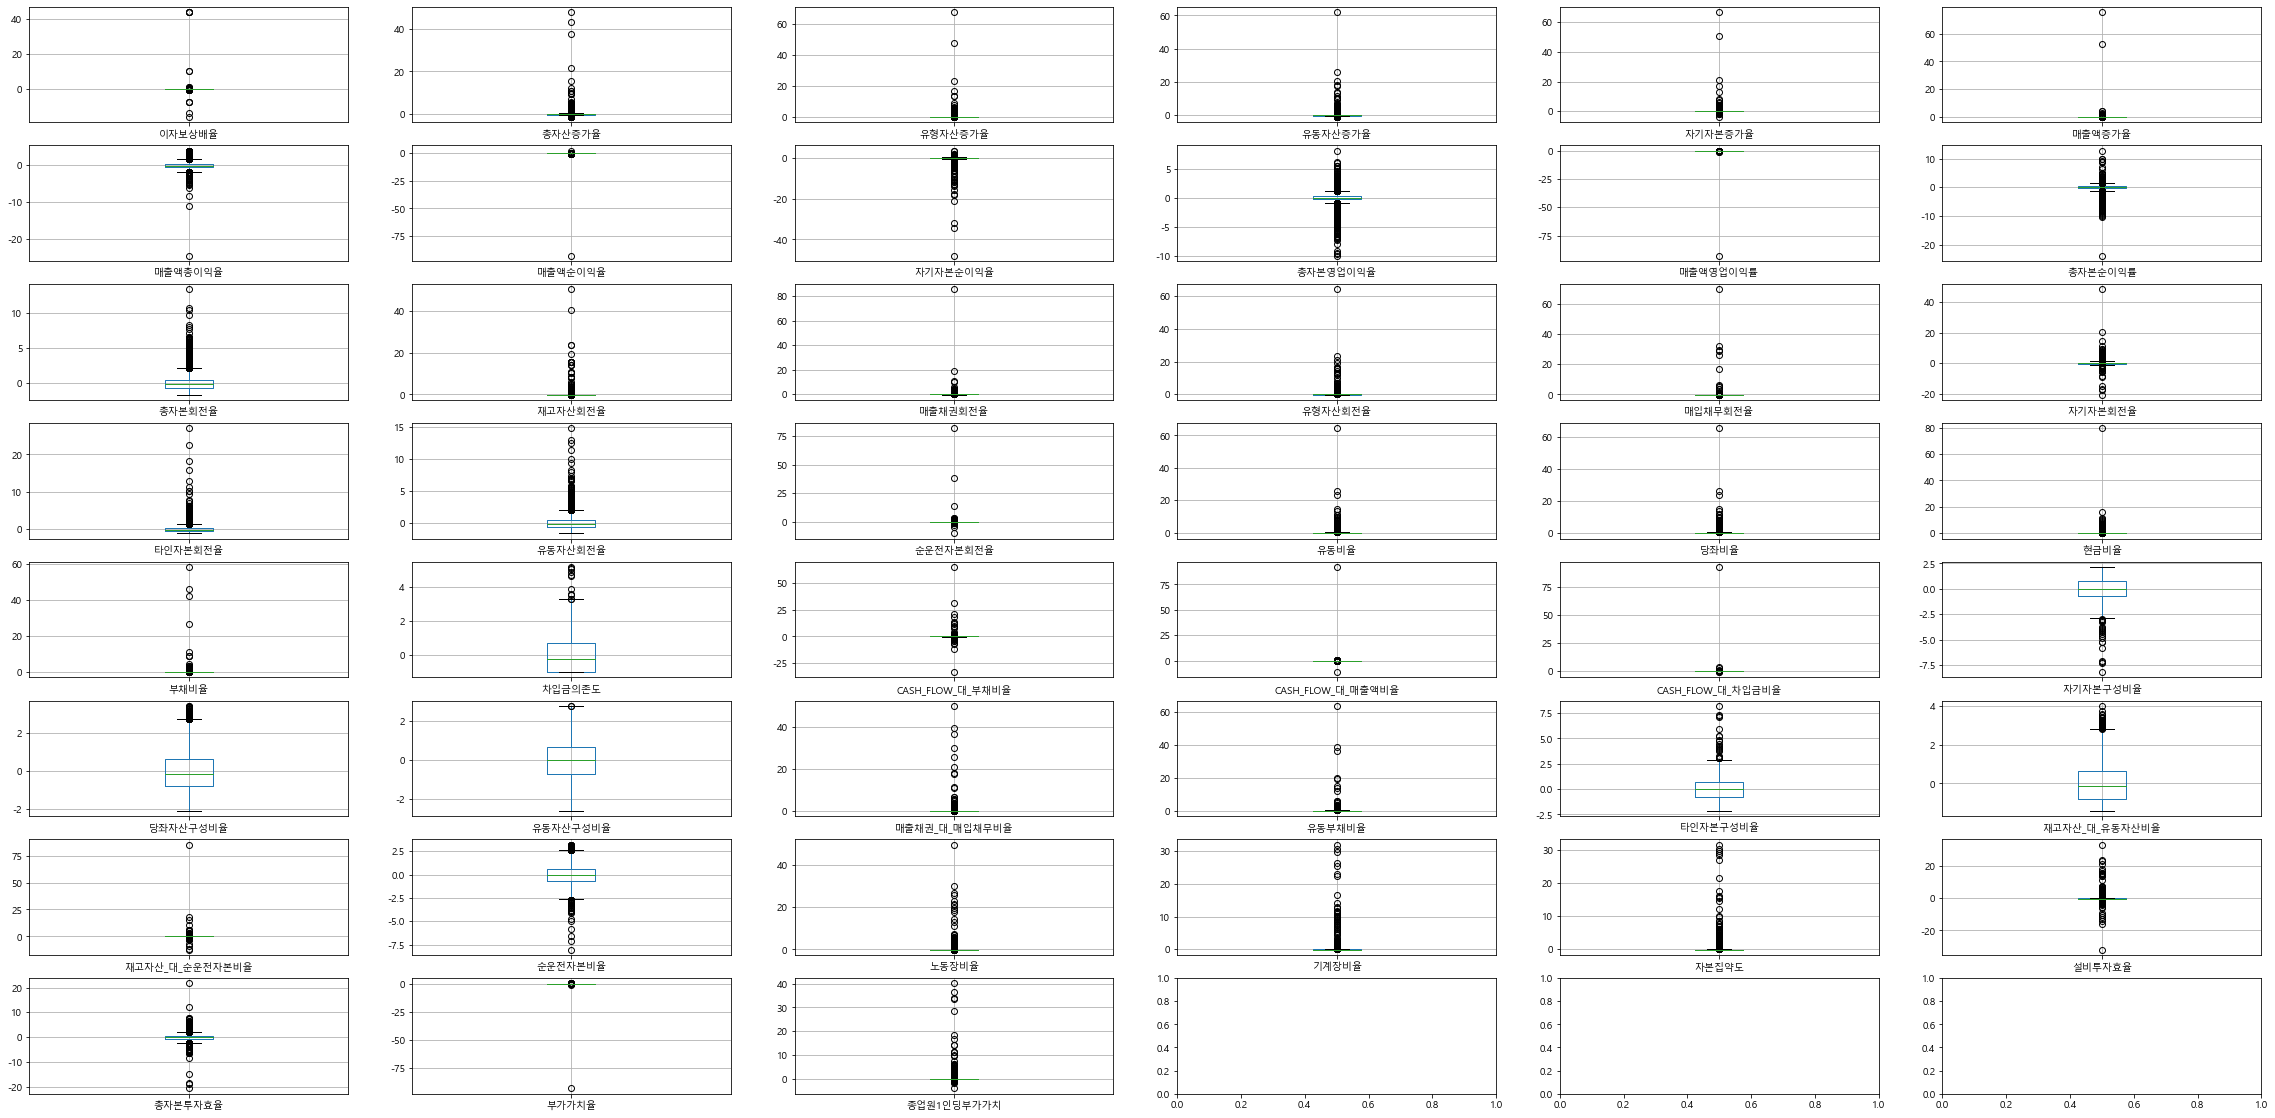

In [27]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
ss_sc2.boxplot(column='종업원1인딩부가가치', ax=axes[7,2])

plt.show()

In [ ]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(ss_sc2['종업원1인딩부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인딩부가가치")

plt.show()

In [279]:
from scipy.stats.mstats import winsorize
ss_sc3 = ss_sc2.copy()
for col in ss_sc3.columns:
     ss_sc3[col] = winsorize(ss_sc3[col], limits= 0.025)

In [259]:
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(8, 6)
# fig.set_size_inches((40,20))

# ss_sc3.boxplot(column='이자보상배율', ax=axes[0,0])
# ss_sc3.boxplot(column='총자산증가율', ax=axes[0,1])
# ss_sc3.boxplot(column='유형자산증가율', ax=axes[0,2])
# ss_sc3.boxplot(column='유동자산증가율', ax=axes[0,3])
# ss_sc3.boxplot(column='자기자본증가율', ax=axes[0,4])
# ss_sc3.boxplot(column='매출액증가율', ax=axes[0,5])
# ss_sc3.boxplot(column='매출액총이익율', ax=axes[1,0])
# ss_sc3.boxplot(column='매출액순이익율', ax=axes[1,1])
# ss_sc3.boxplot(column='자기자본순이익율', ax=axes[1,2])
# ss_sc3.boxplot(column='총자본영업이익율', ax=axes[1,3])
# ss_sc3.boxplot(column='매출액영업이익률', ax=axes[1,4])
# ss_sc3.boxplot(column='총자본순이익률', ax=axes[1,5])
# ss_sc3.boxplot(column='총자본회전율', ax=axes[2,0])
# ss_sc3.boxplot(column='재고자산회전율', ax=axes[2,1])
# ss_sc3.boxplot(column='매출채권회전율', ax=axes[2,2])
# ss_sc3.boxplot(column='유형자산회전율', ax=axes[2,3])
# ss_sc3.boxplot(column='매입채무회전율', ax=axes[2,4])
# ss_sc3.boxplot(column='자기자본회전율', ax=axes[2,5])
# ss_sc3.boxplot(column='타인자본회전율', ax=axes[3,0])
# ss_sc3.boxplot(column='유동자산회전율', ax=axes[3,1])
# ss_sc3.boxplot(column='순운전자본회전율', ax=axes[3,2])
# ss_sc3.boxplot(column='유동비율', ax=axes[3,3])
# ss_sc3.boxplot(column='당좌비율', ax=axes[3,4])
# ss_sc3.boxplot(column='현금비율', ax=axes[3,5])
# ss_sc3.boxplot(column='부채비율', ax=axes[4,0])
# ss_sc3.boxplot(column='차입금의존도', ax=axes[4,1])
# ss_sc3.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
# ss_sc3.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
# ss_sc3.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
# ss_sc3.boxplot(column='자기자본구성비율', ax=axes[4,5])
# ss_sc3.boxplot(column='당좌자산구성비율', ax=axes[5,0])
# ss_sc3.boxplot(column='유동자산구성비율', ax=axes[5,1])
# ss_sc3.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
# ss_sc3.boxplot(column='유동부채비율', ax=axes[5,3])
# ss_sc3.boxplot(column='타인자본구성비율', ax=axes[5,4])
# ss_sc3.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
# ss_sc3.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
# ss_sc3.boxplot(column='순운전자본비율', ax=axes[6,1])
# ss_sc3.boxplot(column='노동장비율', ax=axes[6,2])
# ss_sc3.boxplot(column='기계장비율', ax=axes[6,3])
# ss_sc3.boxplot(column='자본집약도', ax=axes[6,4])
# ss_sc3.boxplot(column='설비투자효율', ax=axes[6,5])
# ss_sc3.boxplot(column='총자본투자효율', ax=axes[7,0])
# ss_sc3.boxplot(column='부가가치율', ax=axes[7,1])
# ss_sc3.boxplot(column='종업원1인딩부가가치', ax=axes[7,2])

# plt.show()

In [260]:
# # 정규성 qqplot
# # 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
# from matplotlib.pyplot import imread
# import scipy.stats as stats

# fig, axes = plt.subplots(9,5)
# fig.set_size_inches((40,20))

# stats.probplot(ss_sc3['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# axes[0,0].title.set_text("이자보상배율")
# stats.probplot(ss_sc3['총자산증가율'],dist=stats.norm,plot=axes[0,1])
# axes[0,1].title.set_text("총자산증가율")
# stats.probplot(ss_sc3['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
# axes[0,2].title.set_text("유형자산증가율")
# stats.probplot(ss_sc3['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
# axes[0,3].title.set_text("유동자산증가율")
# stats.probplot(ss_sc3['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
# axes[0,4].title.set_text("자기자본증가율")
# stats.probplot(ss_sc3['매출액증가율'],dist=stats.norm,plot=axes[1,0])
# axes[0,0].title.set_text("매출액증가율")
# stats.probplot(ss_sc3['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
# axes[1,1].title.set_text("매출액총이익율")
# stats.probplot(ss_sc3['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
# axes[1,2].title.set_text("매출액순이익율")
# stats.probplot(ss_sc3['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
# axes[1,3].title.set_text("자기자본순이익율")
# stats.probplot(ss_sc3['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
# axes[1,4].title.set_text("총자본영업이익율")
# stats.probplot(ss_sc3['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
# axes[2,0].title.set_text("매출액영업이익률")
# stats.probplot(ss_sc3['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
# axes[2,1].title.set_text("총자본순이익률")
# stats.probplot(ss_sc3['총자본회전율'],dist=stats.norm,plot=axes[2,2])
# axes[2,2].title.set_text("총자본회전율")
# stats.probplot(ss_sc3['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
# axes[2,3].title.set_text("재고자산회전율")
# stats.probplot(ss_sc3['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
# axes[2,4].title.set_text("매출채권회전율")
# stats.probplot(ss_sc3['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
# axes[3,0].title.set_text("유형자산회전율")
# stats.probplot(ss_sc3['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
# axes[3,1].title.set_text("매입채무회전율")
# stats.probplot(ss_sc3['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
# axes[3,2].title.set_text("자기자본회전율")
# stats.probplot(ss_sc3['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
# axes[3,3].title.set_text("타인자본회전율")
# stats.probplot(ss_sc3['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
# axes[3,4].title.set_text("유동자산회전율")
# stats.probplot(ss_sc3['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
# axes[4,0].title.set_text("순운전자본회전율")
# stats.probplot(ss_sc3['유동비율'],dist=stats.norm,plot=axes[4,1])
# axes[4,1].title.set_text("유동비율")
# stats.probplot(ss_sc3['당좌비율'],dist=stats.norm,plot=axes[4,2])
# axes[4,2].title.set_text("당좌비율")
# stats.probplot(ss_sc3['현금비율'],dist=stats.norm,plot=axes[4,3])
# axes[4,3].title.set_text("현금비율")
# stats.probplot(ss_sc3['부채비율'],dist=stats.norm,plot=axes[4,4])
# axes[4,4].title.set_text("부채비율")
# stats.probplot(ss_sc3['차입금의존도'],dist=stats.norm,plot=axes[5,0])
# axes[5,0].title.set_text("차입금의존도")
# stats.probplot(ss_sc3['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
# axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
# stats.probplot(ss_sc3['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
# axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
# stats.probplot(ss_sc3['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
# axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
# stats.probplot(ss_sc3['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
# axes[5,4].title.set_text("자기자본구성비율")
# stats.probplot(ss_sc3['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
# axes[6,0].title.set_text("당좌자산구성비율")
# stats.probplot(ss_sc3['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
# axes[6,1].title.set_text("유동자산구성비율")
# stats.probplot(ss_sc3['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
# axes[6,2].title.set_text("매출채권_대_매입채무비율")
# stats.probplot(ss_sc3['유동부채비율'],dist=stats.norm,plot=axes[6,3])
# axes[6,3].title.set_text("유동부채비율")
# stats.probplot(ss_sc3['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
# axes[6,4].title.set_text("타인자본구성비율")
# stats.probplot(ss_sc3['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
# axes[7,0].title.set_text("재고자산_대_유동자산비율")
# stats.probplot(ss_sc3['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
# axes[7,1].title.set_text("재고자산_대_순운전자본비율")
# stats.probplot(ss_sc3['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
# axes[7,2].title.set_text("순운전자본비율")
# stats.probplot(ss_sc3['노동장비율'],dist=stats.norm,plot=axes[7,3])
# axes[7,3].title.set_text("노동장비율")
# stats.probplot(ss_sc3['기계장비율'],dist=stats.norm,plot=axes[7,4])
# axes[7,4].title.set_text("기계장비율")
# stats.probplot(ss_sc3['자본집약도'],dist=stats.norm,plot=axes[8,0])
# axes[8,0].title.set_text("자본집약도")
# stats.probplot(ss_sc3['설비투자효율'],dist=stats.norm,plot=axes[8,1])
# axes[8,1].title.set_text("설비투자효율")
# stats.probplot(ss_sc3['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
# axes[8,2].title.set_text("총자본투자효율")
# stats.probplot(ss_sc3['부가가치율'],dist=stats.norm,plot=axes[8,3])
# axes[8,3].title.set_text("부가가치율")
# stats.probplot(ss_sc3['종업원1인딩부가가치'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("종업원1인딩부가가치")

# plt.show()

In [261]:
# from scipy import stats
# from scipy.stats import shapiro

# # 등락률 컬럼만 추출해서 pvalue 구하는 함수
# def shap_pct(df_name):
#     pct_colus = []
#     pct_colus.append([col for col in df_name])
#     for i in pct_colus:
#         for j in i:
#             shapiro_test = shapiro(df_name[j])
#             print(j, "의 pvalue:", shapiro_test.pvalue)

In [262]:
# shap_pct(ss_sc3)

In [280]:
ss_sc3_corr = ss_sc3.corr(method='pearson')

In [281]:
mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))

C:\Users\82104\AppData\Local\Temp\ipykernel_11620\78728671.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))


<AxesSubplot:>

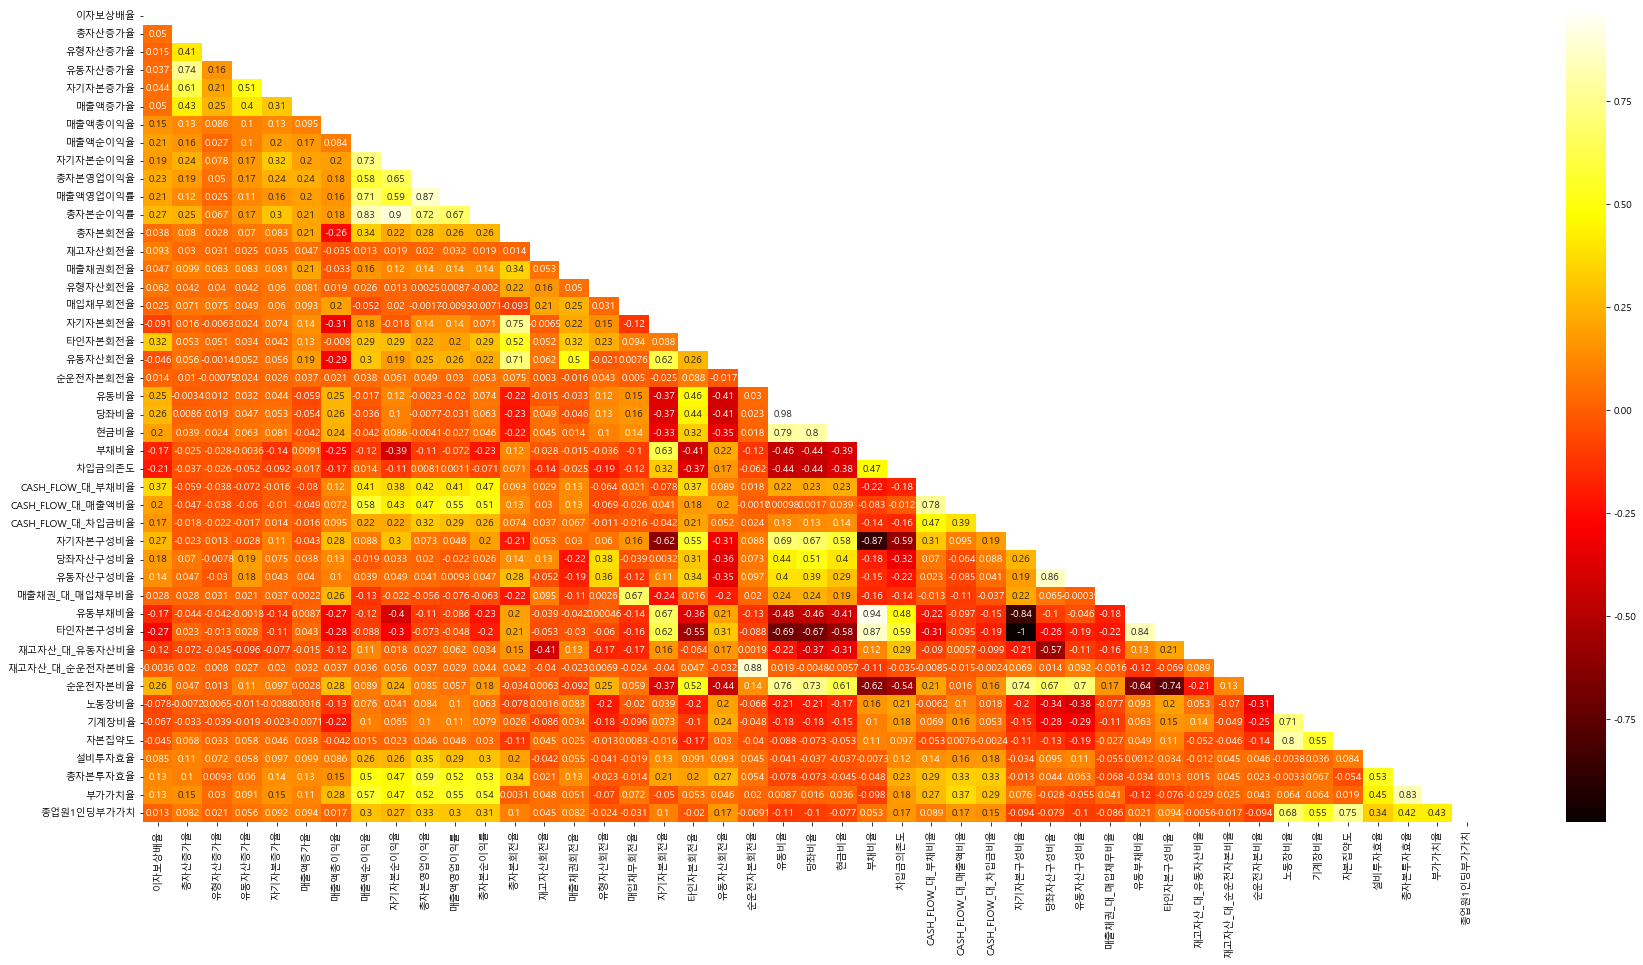

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,15))

sns.heatmap(ss_sc3.corr(),annot=True, cmap='hot',mask=mask)

In [266]:
ss_sc3 = ss_sc3.drop(['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율',
                      '자본집약도','부가가치율','CASH_FLOW_대_차입금비율','이자보상배율','매입채무회전율',
                      'CASH_FLOW_대_매출액비율','총자본회전율'],axis=1)

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc3,i)for i in range(ss_sc3.shape[1])]
vif['features'] = ss_sc3.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,8.819636,매출액순이익율
1,8.559803,노동장비율
2,8.080914,순운전자본비율
3,6.984235,재고자산회전율
4,6.848854,매출채권_대_매입채무비율
5,6.424871,당좌자산구성비율
6,6.005618,종업원1인딩부가가치
7,5.667743,자기자본회전율
8,5.277079,부채비율
9,4.762560,유동자산회전율


<AxesSubplot:>

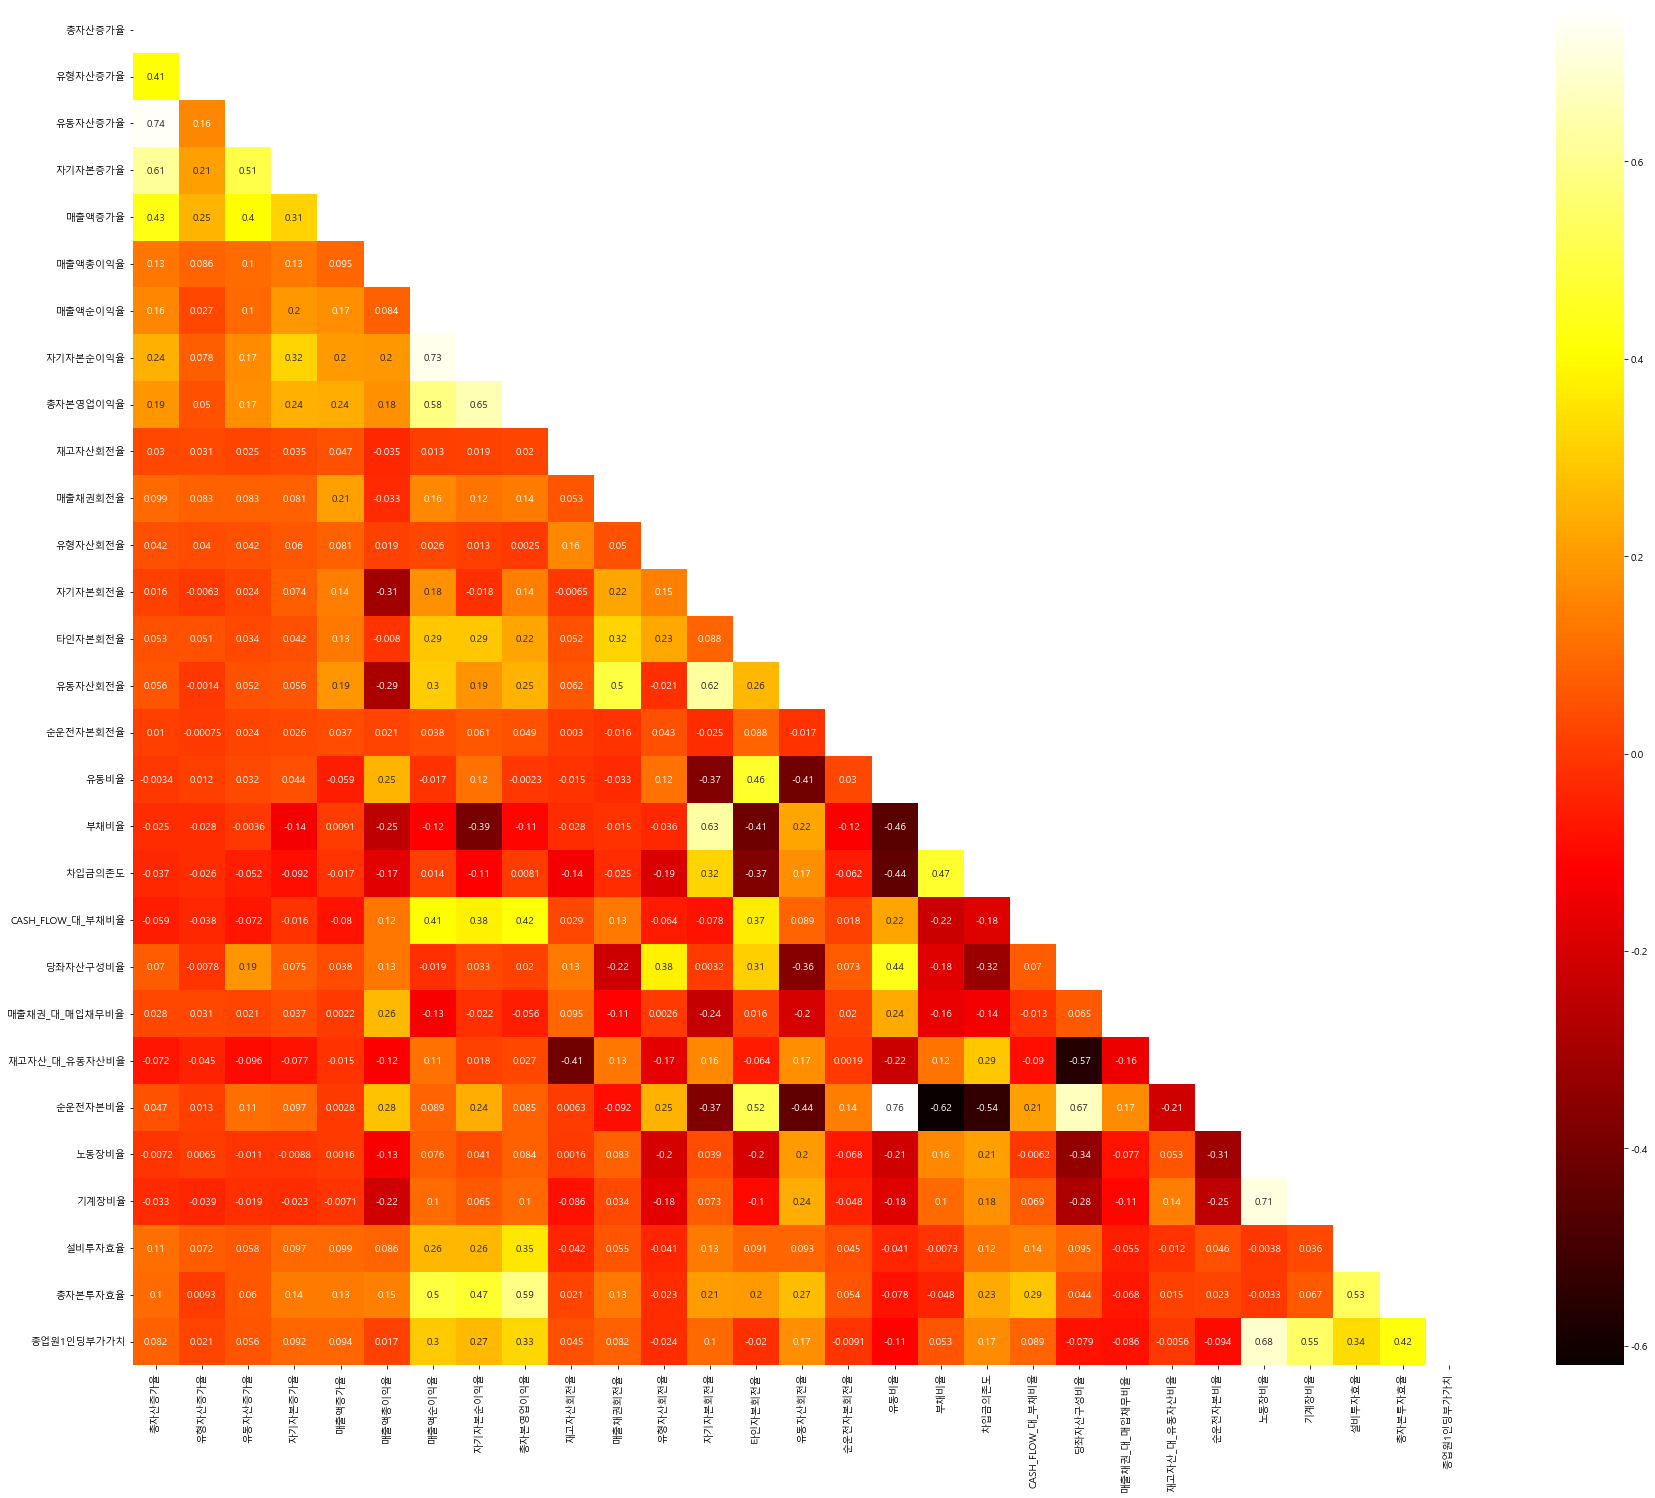

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(ss_sc3.corr(),annot=True, cmap='hot',mask=mask)

In [268]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [269]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
당좌자산구성비율 의 pvalue: 3.134704664694616e-42
매출채권_대_매입채무비율 의 pvalue: 0.0
재고자산_대_유동자산비율 의 pvalue: 1.1630777253895982e-43
순운전자본비율 의 pvalue: 3.139200207362464e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.0
설비투자효율 의 pvalue: 0.0
총자본투자효율 의 pvalue: 1.7645991041856691e-40
종업원1인딩부가가치 의 pvalue: 0.0


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
